In [1]:
import tweepy as tw
import pandas as pd

In [2]:
consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret_token)
api = tw.API(auth)

In [4]:
search_words = "#corona"
date_since = "2020-01-1"
until="2020-01-30"

In [11]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,until=until).items(10)

In [12]:
users_locs = [[tweet.user.screen_name,tweet.user.created_at ,tweet.user.location, tweet.text] for tweet in tweets]
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user',"Date", "location" , "tweet"])

In [13]:
tweet_text.head(20)

,user,Date,location,tweet


In [14]:
tweet_text.to_csv("Downloads/Sentiment Analysis/corona_january.csv")

In [15]:
csv_data = pd.read_csv("Downloads/Sentiment Analysis/corona_january.csv")
csv_data

,Unnamed: 0,user,Date,location,tweet
0,0,JhaRathish,2016-11-09 06:06:48,"Medchal, India",#BiharFightsCorona \nNo corona guidelines in b...
1,1,BlossomAroma1,2021-01-05 09:12:50,"Noida, Uttar Pradesh",High-Quality Hand Sanitizers Fragrances Manufa...
2,2,alisajid629,2013-05-31 15:32:44,NaN,RT @Yuvrajs62281603: Delhi HC grants bail to t...
3,3,Alain52489059,2016-09-21 16:01:35,NaN,RT @horstHENRY: Citizens killed by #covid19|#C...
4,4,Riteshkumar1611,2020-08-31 13:25:21,NaN,RT @Yuvrajs62281603: Delhi HC grants bail to t...
...,...,...,...,...,...
995,995,VillasWesley,2018-09-23 12:36:01,NaN,RT @revoltis: [Event] #JTCC 1996 \n[Car] #Toyo...
996,996,CheerForJoey,2017-06-25 06:12:11,"Sacramento, CA",RT @MrCornSoup: Half a million Americans have ...
997,997,MrCornSoup,2019-01-03 18:13:41,The Atomic Age,Half a million Americans have died of Covid-19...
998,998,camlay_,2016-08-28 23:55:34,NaN,Nurse Reacts to guy taking off mask in public ...


In [17]:
csv_data["location"].fillna("India", inplace = True)
csv_data.to_csv("Downloads/Sentiment Analysis/corona_january.csv")

In [2]:
import tweepy as tw
import pandas as pd
import sys , csv , re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [56]:
consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret_token)
api = tw.API(auth)

In [1]:
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myapp")
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
search_words = "corona"
date_since = "2020-01-1"
NoOfTerms = 1000
data = pd.read_csv("Downloads/Sentiment Analysis/corona_january.csv",engine="python")
polarity = 0
positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
for i in range(NoOfTerms):
    tweetText = data.loc[i,['tweet']].tweet
    tweetloc = data.loc[i,['location']].location
    try:
        location = geolocator.geocode(tweetloc)
        lat = location.latitude
        long = location.longitude
    except:
        lat =47.470706
        long = -99.704723
    radius=2

    analysis = TextBlob(tweetText)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='yellow', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='green', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='red', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='blue', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
        wnegative += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='black', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
        negative += 1
        folium.CircleMarker(location = [lat, long], radius=radius,color='red', fill =True).add_to(world_map)
    elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
        snegative += 1 
        folium.CircleMarker(location = [lat, long], radius=radius,color='purple', fill =True).add_to(world_map)


NameError: name 'pd' is not defined

In [5]:
world_map

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084


3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810


5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595


7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260


8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933


10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
1065

12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
1225

13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
1366

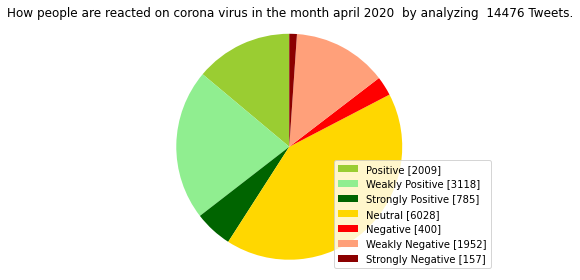

In [27]:
import tweepy as tw
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import sys , csv , re , os
from textblob import TextBlob
import matplotlib.pyplot as plt
import branca
import folium.plugins as plugins

class Analysize_sentiments:
    
    def __init__(self):
        consumer_key = "UODXYhgdi5iSUkb8B3BIludZ0"
        consumer_secret = "JxXDM9xoSjFGXlsWWPRLFGcHeahOKpx7W9uAKWsM0BVHOhyN8f"
        access_token = "964513788606189570-oIVsHe3QKcReJDE3Z2lSiFjga9CTcUc"
        access_secret_token = "mQzFGI4dIfftUGbzND5ZB67ddCkZfYMFMtG0OsoamDyVi"
        auth = tw.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_secret_token)
        api = tw.API(auth)
        
        
    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral):
        labels = ['Positive [' + str(positive) + ']', 'Weakly Positive [' + str(wpositive) + ']','Strongly Positive [' + str(spositive) + ']', 'Neutral [' + str(neutral) + ']',
                  'Negative [' + str(negative) + ']', 'Weakly Negative [' + str(wnegative) + ']', 'Strongly Negative [' + str(snegative) + ']']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacted on corona virus in the month april 2020  by analyzing  14476 Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        
        
        
    def get_data(self):
        filename = 'april.csv'
        cols = ['user','date','location','text']
        path = '/home/prachi/Downloads/Sentiment Analysis/corona geo-tagged/4/'
        os.chdir(path)
        data = pd.read_csv(filename,names= cols,header=None)
        #geolocator = Nominatim(user_agent="myapp")
        #world_map= folium.Map(tiles="cartodbpositron")
        #marker_cluster = MarkerCluster().add_to(world_map)
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0
        num=0
        #colormap = branca.colormap.linear.RdYlGn_10.scale(-1, 1)
        #colormap = cmp.LinearColormap(colors=branca.colormap.linear.RdYlGn_10.scale(-1, 1), index=[-1, -0.6, -0.3, 0.1,0, 0.3,0.6,1])
        #colormap = colormap.to_step(index=[-1, -0.6, -0.3, 0.1,0, 0.3,0.6,1])
        #colormap.caption = 'Sentiment of tweets'
        #colormap.add_to(world_map)
        for tweet in data.iterrows():
            #print(tweet[1]['location'])
            #user = tweet.screen_name
            #date = tweet.created_at
            #print(tweet)
            #location = tweet[1]['location']
            text = tweet[1]['text']
            num+=1
            print(num)
            #try:
                #tweetloc = geolocator.geocode(location)
                #lat = tweetloc.latitude
                #long = tweetloc.longitude
            #except:
                #lat = 47.470706
                #long = -99.704723
            
            analysis = TextBlob(text)
            polarity = analysis.sentiment.polarity
            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='yellow', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='green', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='red', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='blue', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='black', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
                #folium.CircleMarker(location = [lat, long], radius=radius,color='cyan', fill =True).add_to(world_map)
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1 
                #folium.CircleMarker(location = [lat, long], radius=radius,color='voilet', fill =True).add_to(world_map)

            #folium.CircleMarker(location = [lat, long], radius=5,color=colormap(polarity),fill_color=colormap(polarity), fill =True).add_to(world_map)
        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral)
            
            
            
    
        
        
        #world_map.save(outfile="april_sentiment.html")
        
senti = Analysize_sentiments()
senti.get_data()

In [26]:
%pwd


'/home/prachi/Downloads/Sentiment Analysis/corona geo-tagged/3'